## Маркетинговая аналитика Яндекс.Афиши

### План исследования
#### 1. [Загрузка данных и подготовка к анализу](#open)
#### 2. [Продуктовые метрики](#product)
#### 3. [Метрики электронной коммерции](#commerce)
#### 4. [Маркетинговые метрики](#marketing)
#### 5. [Общий вывод](#conclusion)

### 1. Загрузка данных и подготовка к анализу
<a id="open"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Загрузим данные.

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

Изучим данные. Начнём с визитов.

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits.duplicated().sum()

0

In [6]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [7]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [8]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Теперь покупки.

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
orders.columns = ['buy_ts', 'revenue', 'uid']

In [12]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S')

In [13]:
orders.duplicated().sum()

0

Наконец, затраты на маркетинг.

In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [15]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [16]:
costs.duplicated().sum()

0

In [17]:
costs.columns = ['source_id', 'date', 'costs']

In [18]:
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m-%d')

Датасеты загружены, колонки переименованы в более удобный вид, проверка на дубликаты и пропуски выполнена.

### 2. Продуктовые метрики
<a id="product"></a>

#### 2.1 Оценка пользовательской активности

Выделяем год/месяц/неделю/день/дату посещения.

In [19]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_day'] = visits['start_ts'].dt.day
visits['session_date'] = visits['start_ts'].dt.date

Считаем активность пользователей за сооответствующие периоды.

In [20]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year','session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year','session_month']).agg({'uid': 'nunique'}).mean()

In [21]:
print('Количество уникальных пользователей в день составляет', int(dau_total))
print('Количество уникальных пользователей в неделю составляет', int(wau_total))
print('Количество уникальных пользователей в месяц составляет', int(mau_total))

Количество уникальных пользователей в день составляет 907
Количество уникальных пользователей в неделю составляет 5716
Количество уникальных пользователей в месяц составляет 23228


Видно, что количество уникальных пользователей в день не в семь раз меньше еженедельного количества, и не в 30 - ежемесячного. Среди клиентов есть повторяющиеся.

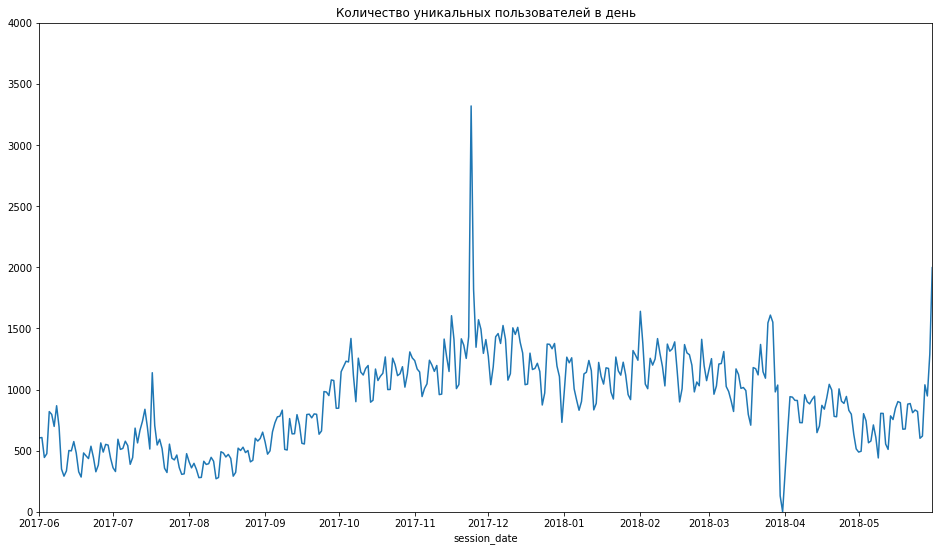

In [22]:
dau = (
    visits.groupby('session_date')
    .agg({'uid': 'nunique'})
    .plot(figsize = (16,9), ylim = (0,4000),
          legend = False, title = 'Количество уникальных пользователей в день')
)

Найдём день с максимальным количеством посетителей.

In [23]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
dau.loc[dau['uid'] == dau['uid'].max()]

,session_date,uid
176,2017-11-24,3319


24 ноября.

In [24]:
dau.loc[dau['uid'] == dau['uid'].min()]

,session_date,uid
303,2018-03-31,1


31 марта.

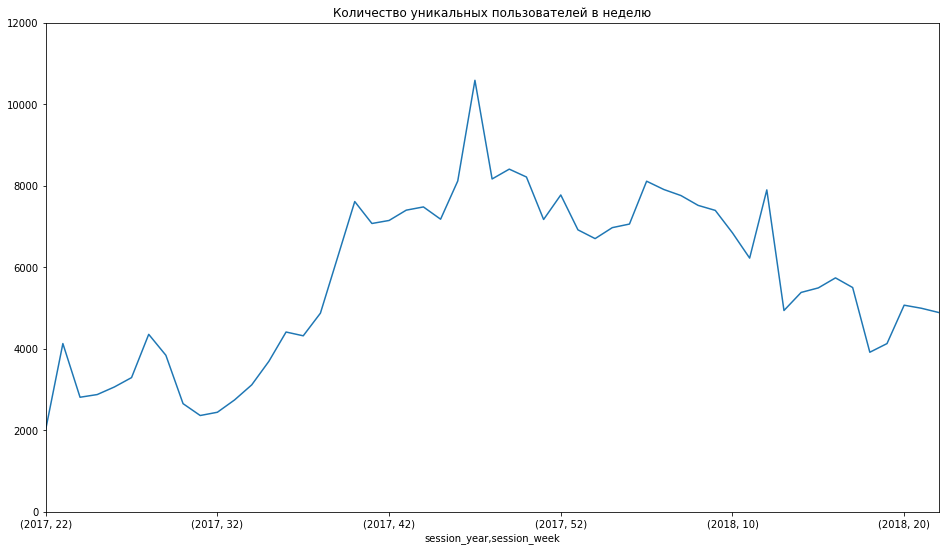

In [25]:
wau = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .plot(figsize = (16,9), ylim = (0,12000),
          legend = False, title = 'Количество уникальных пользователей в неделю')
)

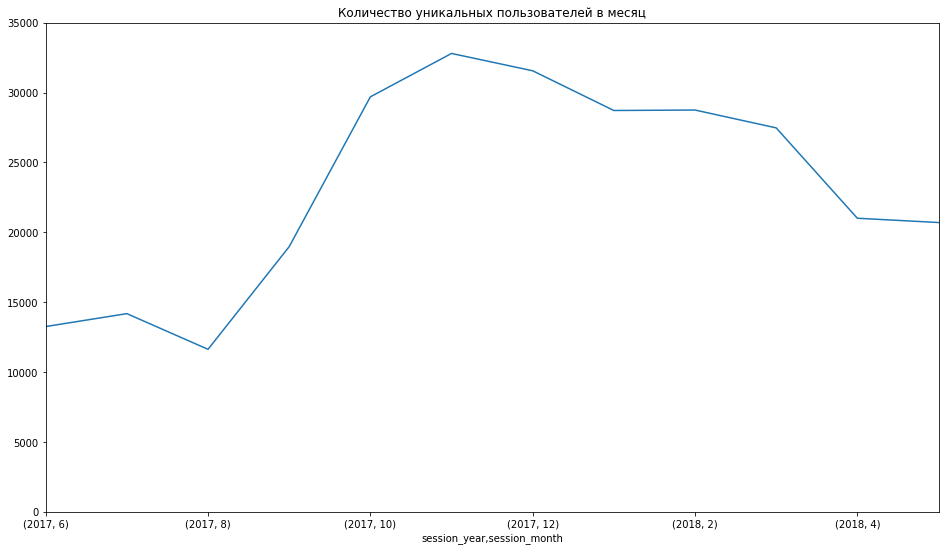

In [26]:
mau = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .plot(figsize = (16,9), ylim = (0,35000),
          legend = False, title = 'Количество уникальных пользователей в месяц')
)

Пик пользовательской активности пришёлся на октябрь 2017 - март 2018, что хорошо заметно по графикам динамики DAU, WAU и MAU. Пик пришёлся на декабрь-январь, новогодние праздники - подходящее время, чтобы сходить в кино или театр.

#### 2.2 Ежедневное количество заходов на сайт

In [27]:
sessions_per_day = (visits.groupby(['session_year','session_date'])
                         .agg({'uid':'count'})
                   )
print('Среднее количество заходов на сайт в день составляет',int(sessions_per_day.mean().round()))

Среднее количество заходов на сайт в день составляет 987


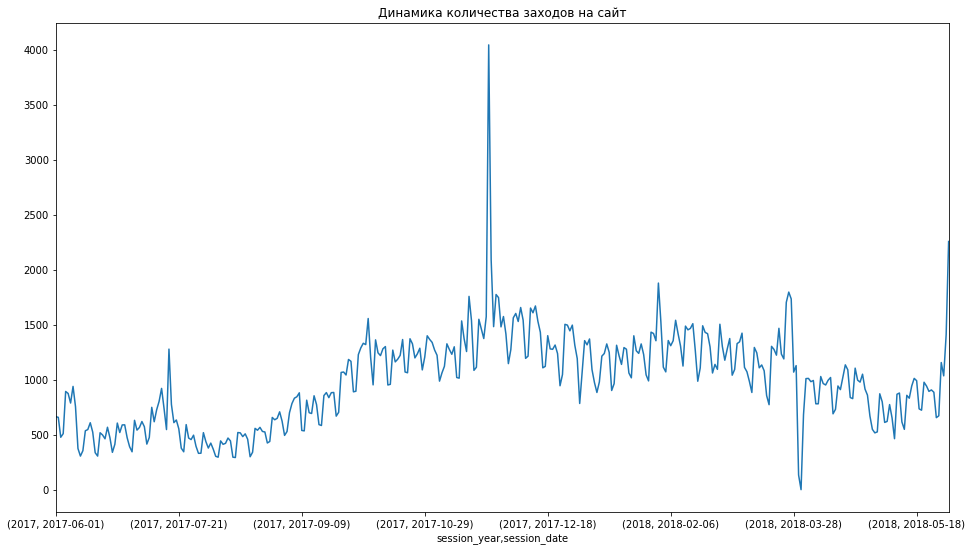

In [28]:
sessions_per_day.plot(title = 'Динамика количества заходов на сайт', legend = False, figsize = (16,9))

График количества заходов на сайт довольно сильно коррелирует с DAU - видно те же пики и провалы. Есть мнение, что редкий посетитель заходит на сайт больше одного раза.

Теперь длительность сессий. Сначала используем метод seconds.

In [29]:
visits['session_duration_sec'] = (
    visits['end_ts'] - visits['start_ts']
).dt.seconds

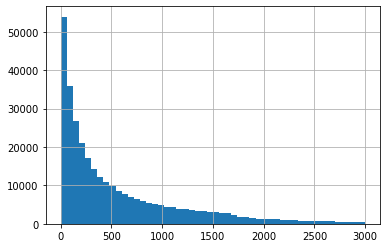

In [30]:
visits['session_duration_sec'].hist(bins=50, range=[1,3000]) 

In [31]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

Распределение неравномерное, поэтому используем моду числового ряда, а не среднее.

In [32]:
print('Средняя продолжительность пользовательской сессии составляет {} секунд.'
      .format(int(visits['session_duration_sec']
                  .mode()))) 

Средняя продолжительность пользовательской сессии составляет 60 секунд.


А теперь будем использовать метод total_seconds(), возвращающий количество секунд вне зависимости от дат.

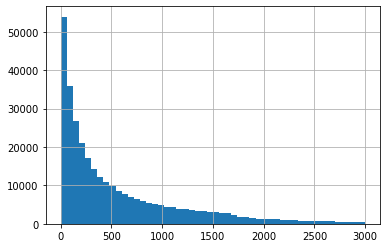

In [33]:
visits['session_duration_sec'] = (
    visits['end_ts'] - visits['start_ts']
).dt.total_seconds()

visits['session_duration_sec'].hist(bins=50, range=[1,3000]) 

In [34]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_sec, dtype: float64

Внезапно закралась ошибка: в датасете есть некоторые даты окончания сессий были раньше, чем даты начала. Избавимся от них и посчитаем среднее.

In [35]:
visits_filter = visits.loc[visits['session_duration_sec'] >= 0]
print('Средняя продолжительность пользовательской сессии составляет {} секунд.'
      .format(int(visits['session_duration_sec']
                  .mode()))) 

Средняя продолжительность пользовательской сессии составляет 60 секунд.


Большинству пользователей хватает минуты на сайте. За это время вряд ли получится купить билет, разве что посмотреть, что идёт в кино.

#### 2.3 Коэффициент удержания с использованием когортного анализа

Найдём дату первого посещения каждого пользователя.

In [36]:
first_visit = visits.groupby('uid')['start_ts'].min()
first_visit.name = 'first_visit'

first_visit.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_visit, dtype: datetime64[ns]

Соединим c таблицей visits.

In [37]:
visits = visits.join(first_visit, on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_day,session_date,session_duration_sec,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-20,1080.0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-19,1680.0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01,0.0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,2018-05-20,1440.0,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,27,2017-12-27,0.0,2017-12-27 14:06:00


In [38]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 12 columns):
device                  359400 non-null object
end_ts                  359400 non-null datetime64[ns]
source_id               359400 non-null int64
start_ts                359400 non-null datetime64[ns]
uid                     359400 non-null uint64
session_year            359400 non-null int64
session_month           359400 non-null int64
session_week            359400 non-null int64
session_day             359400 non-null int64
session_date            359400 non-null object
session_duration_sec    359400 non-null float64
first_visit             359400 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(5), object(2), uint64(1)
memory usage: 32.9+ MB


Переведём значения столбца first_visit в нужный тип данных.

In [39]:
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')

Добавим месяц текущего визита.

In [40]:
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

Рассчитаем lifetime пользователя в рамках когорты.

In [41]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

Посчитаем, сколько пользователей было в когорте в определённый lifetime.

In [42]:
visit_cohorts = visits.groupby(['first_visit_month','cohort_lifetime'])['uid'].nunique().reset_index()
visit_cohorts.head()

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Найдём исходное количество пользователей для каждой когорты.

In [43]:
initial_cohorts_users = visit_cohorts[visit_cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
initial_cohorts_users.rename(columns={'uid':'initial_users'}, inplace=True)
initial_cohorts_users.head()

,first_visit_month,initial_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Соединим две последние таблицы.

In [44]:
visit_cohorts = visit_cohorts.merge(initial_cohorts_users, on='first_visit_month')

И посчитаем коэффициент удержания.

In [45]:
visit_cohorts['retention'] = (visit_cohorts['uid']/visit_cohorts['initial_users'])
retention_pivot = visit_cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', 
                          values='retention', aggfunc='mean')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данные первого столбца лучше убрать, т.к. на хитмапе это приведёт к искажению цветов из-за большой разницы значений.

In [46]:
retention_pivot = retention_pivot.drop([0],axis = 1)

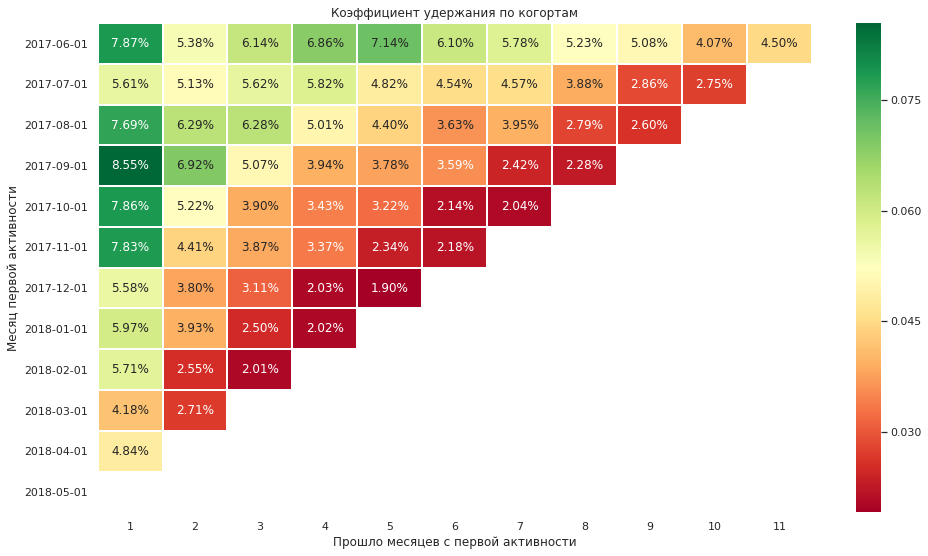

In [47]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('Коэффициент удержания по когортам')
ax = sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='white', cmap="RdYlGn")
ax.set_yticklabels(retention_pivot.index.date)
plt.xlabel('Прошло месяцев с первой активности')
plt.ylabel('Месяц первой активности')
plt.show()

Июньская когорта демонстрирует лучшее удержание - даже на десятый месяц сохранилось больше 5% пользователей, которые пришли в июне. Другие когорты падают ниже этой отметки в лучшем случае на пятый месяц.

Максимальный результат по доле вернувшихся на второй месяц удерживает сентябрьская когорта - больше 8,5%.

In [48]:
mean_second_retention = retention_pivot[1].mean()

In [49]:
print('Cредний Retention Rate на второй месяц «жизни» когорт составляет {:.2%}'.format(mean_second_retention))

Cредний Retention Rate на второй месяц «жизни» когорт составляет 6.52%


И отличается этот уровень от когорты к когорте достаточно сильно - от 4% до 8,5%

### 3. Метрики электронной коммерции
<a id="commerce"></a>

#### 3.1 Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

Найдём время и дату первой сессии.

In [50]:
first_sessions = visits.groupby(['uid']).agg({'start_ts':'min', 'source_id':'first'})
first_sessions.columns = ['first_activity', 'first_source']

Найдем время первой покупки.

In [51]:
first_orders = orders.groupby(['uid']).agg({'buy_ts':'min'})
first_orders.columns = ['first_buy_ts']

Добавим дату и время первой сессии в информацию по первым заказам.

In [52]:
first_orders = first_orders.join(first_sessions,on='uid')

Найдем время, прошедшее с момента первой сессии до первой покупки.

In [53]:
first_orders['time_to_first_purchase'] = (first_orders['first_buy_ts'] - first_orders['first_activity']) / np.timedelta64(1, 'm')
print('Медиана времени с первой сессии до первой покупки: {} минут'.format(int(first_orders['time_to_first_purchase'].median())))
print('Мода времени с первой сессии до первой покупки: {} минута'.format(int(first_orders['time_to_first_purchase'].mode())))

Медиана времени с первой сессии до первой покупки: 16 минут
Мода времени с первой сессии до первой покупки: 1 минута


#### 3.2 Cреднее количество покупок на одного покупателя

In [54]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [55]:
orders['year'] = orders['buy_ts'].dt.year
orders['month'] = orders['buy_ts'].dt.month
orders['week'] = orders['buy_ts'].dt.week
orders['day'] = orders['buy_ts'].dt.date

Найдём время первой покупки для каждого клиента.

In [56]:
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min()
first_order_date_by_customers.name = 'first_buy_ts'
first_order_date_by_customers.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_buy_ts, dtype: datetime64[ns]

Соединим с таблицей orders.

In [57]:
orders = orders.join(first_order_date_by_customers, on='uid')

In [58]:
orders['first_buy_month'] = orders['first_buy_ts'].astype('datetime64[M]')
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')

In [59]:
orders.head()

,buy_ts,revenue,uid,year,month,week,day,first_buy_ts,first_buy_month,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [60]:
day_purchases_per_user = orders.groupby(['day', 'uid']).agg({'buy_ts':'count'}).mean()[0]
week_purchases_per_user = orders.groupby(['year', 'week', 'uid']).agg({'buy_ts':'count'}).mean()[0]
month_purchases_per_user = orders.groupby(['month', 'uid']).agg({'buy_ts':'count'}).mean()[0]
year_purchases_per_user = orders.groupby(['year', 'uid']).agg({'buy_ts':'count'}).mean()[0]
print('''В среднем на одного пользователя покупок:
В день - {:.2f},
В неделю - {:.2f},
В месяц - {:.2f},
В год - {:.2f}'''.format(day_purchases_per_user, 
                         week_purchases_per_user, 
                         month_purchases_per_user, 
                         year_purchases_per_user))

В среднем на одного пользователя покупок:
В день - 1.08,
В неделю - 1.16,
В месяц - 1.23,
В год - 1.32


Сервис получается очень "одноразовым" - клиенты редко возвращаются, как установили ранее, и количество покупок в среднем на одного клиента чуть больше единицы за год.

#### 3.3 Средний чек покупки

In [61]:
orders.head()

,buy_ts,revenue,uid,year,month,week,day,first_buy_ts,first_buy_month,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [62]:
mean_purchase_by_month = orders.groupby('buy_month').agg({'revenue': 'mean'})

In [63]:
month_lst = ['June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']

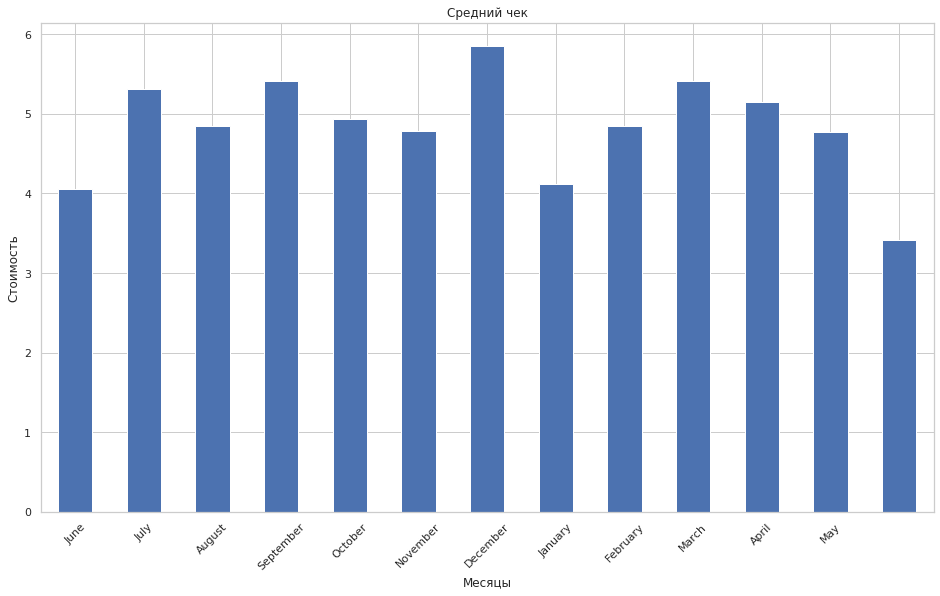

In [64]:
ax = mean_purchase_by_month.plot(kind='bar', figsize=(16, 9), legend = False)
ax.set_xticklabels(month_lst, rotation=45)
plt.title('Средний чек')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Стоимость')
plt.show()

На таком графике трудно выявить какую-то зависимость. Разве что наибольший чек покупки в декабре: вероятно в предновогодние праздники люди выбираются в кино/театр семьями - оттого и чек больше. Или заведения просто поднимают цены, предвидя высокий спрос. Средний чек покупки колеблется от 4 до 5,5.

#### 3.4 Изменение LTV покупателя

In [65]:
orders.head()

,buy_ts,revenue,uid,year,month,week,day,first_buy_ts,first_buy_month,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01


Маржинальность сервиса - 100%.

In [66]:
margin_rate = 1

Размеры когорт.

In [67]:
cohort_sizes = (
    orders.groupby('first_buy_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_buy_month', 'buyers']

Рассчитаем выручку каждой когорты по месяцам и объединим таблицу с количеством пользователей и выручкой.

In [68]:
orders_revenue = orders.groupby(['first_buy_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index()

In [69]:
ltv_report = pd.merge(cohort_sizes,orders_revenue, on='first_buy_month')

Выделим срок жизни когорт, посчитаем ltv и посмотрим на результат.

In [70]:
ltv_report['age'] = ((ltv_report['buy_month'] - ltv_report['first_buy_month']) / np.timedelta64(1,'M')).round().astype('int')
ltv_report['ltv'] = ltv_report['revenue']/ltv_report['buyers']
result = ltv_report.pivot_table(index='first_buy_month', values='ltv', columns='age', 
                       aggfunc='sum')
result.cumsum(axis = 1)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Очень сильно выделяется LTV сентябрьской когорты, которое превышает аналогичный показатель всех остальных когорт, даже самой первой, июньской.

Теперь посчитаем средний LTV для когорт, существующих не менее 6 месяцев.

In [71]:
print('Средний LTV за полгода составляет {:.2f}'.format(result.cumsum(axis = 1)[6].mean()))

Средний LTV за полгода составляет 8.39


При этом, у августовской и ноябрьской когорт LTV за полгода составил 6, а у сентябрьской - 12.

### 4. Маркетинговые метрики
<a id="marketing"></a>

#### 4.1 Расходы на маркетинг

In [72]:
costs.head()

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [73]:
print('Общие расходы на маркетинг составляют {}'.format(costs['costs'].sum()))

Общие расходы на маркетинг составляют 329131.62


А сколько всего заработали?

In [74]:
print('Общие выручка составляет {}'.format(orders['revenue'].sum().round(2)))

Общие выручка составляет 252057.2


Увы. Тратим больше, чем зарабатываем.

Посмотрим, как различаются расходы на маркетинг по каждому источнику.

In [75]:
costs.groupby('source_id')['costs'].sum().reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Источник №3 преобладает, расходы на источники № 9, 10 несущественны на его фоне.

Теперь посмотрим на распределение во времени.

In [76]:
costs

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [77]:
costs['costs_month'] = costs['date'].astype('datetime64[M]').dt.date

In [78]:
costs_by_month = costs.groupby('costs_month')['costs'].sum()

[Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December'),
 Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May')]

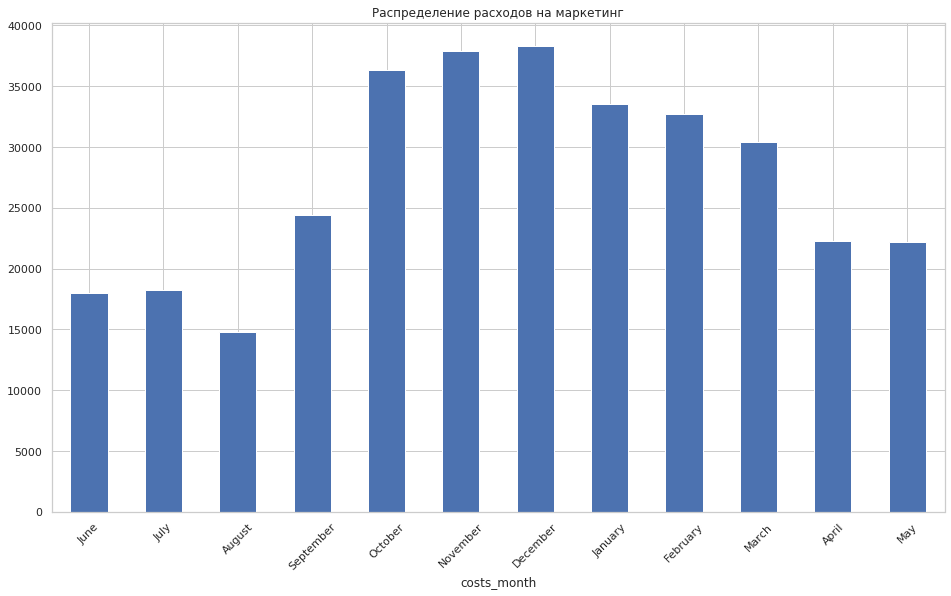

In [79]:
ax = costs_by_month.plot(kind='bar', figsize=(16, 9), legend = False, title = 'Распределение расходов на маркетинг')
ax.set_xticklabels(month_lst, rotation=45)

Резко выросли в сентябре, а потом в октябре, а упали - в апреле. И как только начали увеличивать расходы, появилась супердоходная сентябрьская когорта. Совпадение?

#### 4.2 Стоимость привлечения одного клиента

Сначала вычислим средний САС по проекту

In [80]:
total_costs = costs['costs'].sum()
total_buyers = orders['uid'].nunique()
total_cac = total_costs / total_buyers
print('Средняя стоимость привлечения одного клиента по проекту составляет',total_cac.round(2))

Средняя стоимость привлечения одного клиента по проекту составляет 9.01


Напоминаю, что средний LTV за полгода составляет 8.39 - есть подозрения, что затраты на маркетинг не окупаются.

Теперь считаем САС для каждого рекламного источника в отдельности.

In [81]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

In [82]:
visits_by_source = visits.query('start_ts == first_visit') #чтобы избежать дубликатов - смотрим только по первому источнику
clients_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'})\
                        .rename(columns={'uid':'clients'})

In [83]:
clients_by_source = clients_by_source.reset_index()

In [84]:
cac = pd.merge(clients_by_source, costs_by_source).reset_index()
cac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
index        7 non-null int64
source_id    7 non-null int64
clients      7 non-null int64
costs        7 non-null float64
dtypes: float64(1), int64(3)
memory usage: 352.0 bytes


In [85]:
cac = cac.drop(['index'],axis = 1)

In [86]:
cac['cac'] = cac['costs'] / cac['clients']
cac.sort_values('cac', ascending = False)

,source_id,clients,costs,cac
2,3,10473,141321.63,13.493901
1,2,3506,42806.04,12.209367
4,5,6931,51757.10,7.467479
0,1,2899,20833.27,7.186364
3,4,10296,61073.60,5.931779
5,9,1088,5517.49,5.071222
6,10,1329,5822.49,4.381106


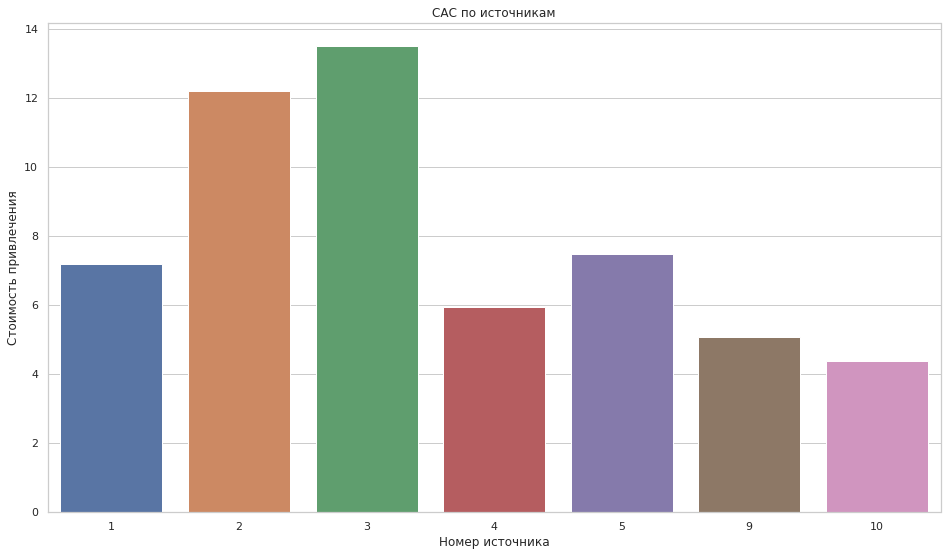

In [87]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="cac", data=cac)
plt.title('CAC по источникам')
ax.set_xlabel('Номер источника')
ax.set_ylabel('Стоимость привлечения')
plt.show()

Затраты на привлечение одного клиента примерно равны во всех источниках, кроме №2 и №3, где они выше в 2,5-3 раза.

#### 4.3 ROMI по когортам

Сгруппируем стоимость расходов на маркетинг по месяцам.

In [88]:
costs_by_month = costs_by_month.reset_index()
costs_by_month['costs_month'] = costs_by_month['costs_month'].astype('datetime64[M]')

Соединим полученную информацию с таблицей, где содержится LTV когорт.

In [89]:
romi_report = ltv_report.merge(costs_by_month, left_on='first_buy_month', right_on='costs_month')

Считаем CAC и ROMI.

In [90]:
romi_report['cac'] = romi_report['costs'] / romi_report['buyers']
romi_report['romi'] = (romi_report['ltv'] /  romi_report['cac']).round(2)

Переводим данные по месяцу первой покупки в более читаемый вид.

In [91]:
romi_report['first_buy_month'] = romi_report['first_buy_month'].dt.strftime('%Y-%m')

In [92]:
romi = romi_report.pivot_table(index='first_buy_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1)

Text(93.5, 0.5, 'Месяц когорты')

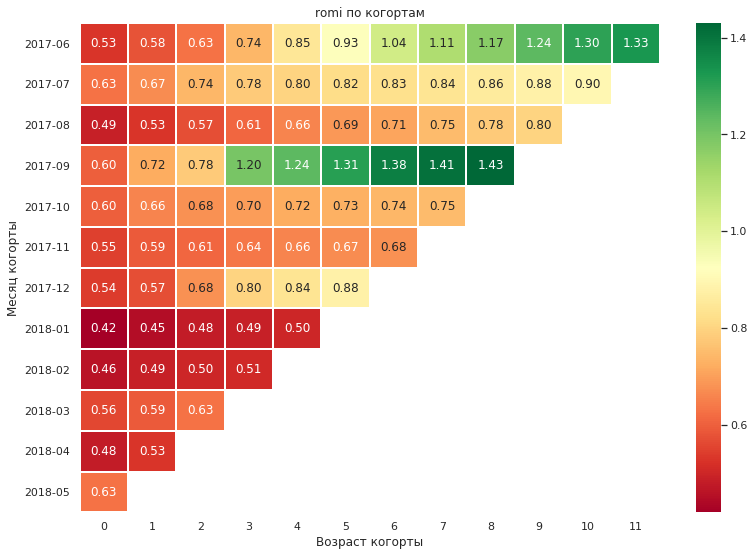

In [93]:
plt.figure(figsize=(13, 9))
plt.title('romi по когортам')
sns.heatmap(romi,annot=True, fmt='.2f', linewidths=1, cmap="RdYlGn")
plt.xlabel('Возраст когорты')
plt.ylabel('Месяц когорты')

Какая же крутая сентябрьская когорта - окупилась уже на четвёртый месяц. Для сравнения, июньская окупилась только на седьмой месяц, а никакая другая когорта не окупилась впринципе.

#### 4.4 ROMI по когортам в разрезе источников

Выполним действия по аналогии с прошлым разделом, предварительно сортируя по рекламным источникам исходные данные по расходам и выручке. Чтобы не повторять одно и то же действие несколько раз, напишем функцию.

In [94]:
visits = visits.sort_values(by='start_ts')

In [95]:
def cohort_romi_source(source_number):
    
    first_source = visits.groupby('uid')['source_id'].first().reset_index()
    first_source = first_source.query('source_id == @source_number')
    
    orders_by_source = orders.merge(first_source, on='uid')
    
    cohort_sizes = (orders_by_source.groupby('first_buy_month')
                                    .agg({'uid':'nunique'})
                                    .reset_index())
    
    orders_revenue = (orders_by_source.groupby(['first_buy_month', 'buy_month'])
                                      .agg({'revenue':'sum'})
                                      .reset_index())
    
    ltv_report = orders_revenue.merge(cohort_sizes, on='first_buy_month')
    
    ltv_report['ltv'] = ltv_report['revenue']/ltv_report['uid']
    
    ltv_report['age'] = ((ltv_report['buy_month'] - ltv_report['first_buy_month']) / np.timedelta64(1,'M')).round().astype('int')
    
    costs_source = costs.query('source_id == @source_number')
    costs_by_month = costs_source.groupby('costs_month')['costs'].sum().reset_index()
    costs_by_month['costs_month'] = costs_by_month['costs_month'].astype('datetime64[M]')
    
    romi_report = ltv_report.merge(costs_by_month, left_on='first_buy_month', right_on='costs_month')
    
    romi_report['cac'] = romi_report['costs'] / romi_report['uid']
    romi_report['romi'] = (romi_report['ltv'] /  romi_report['cac'])
    
    romi_report['first_buy_month'] = romi_report['first_buy_month'].dt.strftime('%Y-%m')
    
    romi = romi_report.pivot_table(index='first_buy_month', columns='age', values='romi', aggfunc = 'mean').cumsum(axis=1)
    
    plt.figure(figsize=(13, 9))
    sns.heatmap(romi,annot=True, fmt='.2f', linewidths=1, cmap="RdYlGn")
    plt.title('romi по когортам источника №'+str(source_number))
    plt.xlabel('Возраст когорты')
    plt.ylabel('Месяц когорты')
    plt.show()

Теперь построим хитмапы для каждого источника.

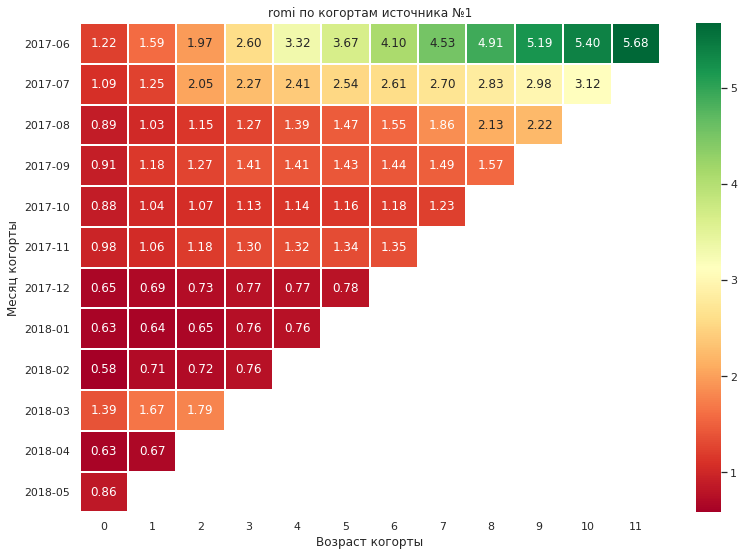

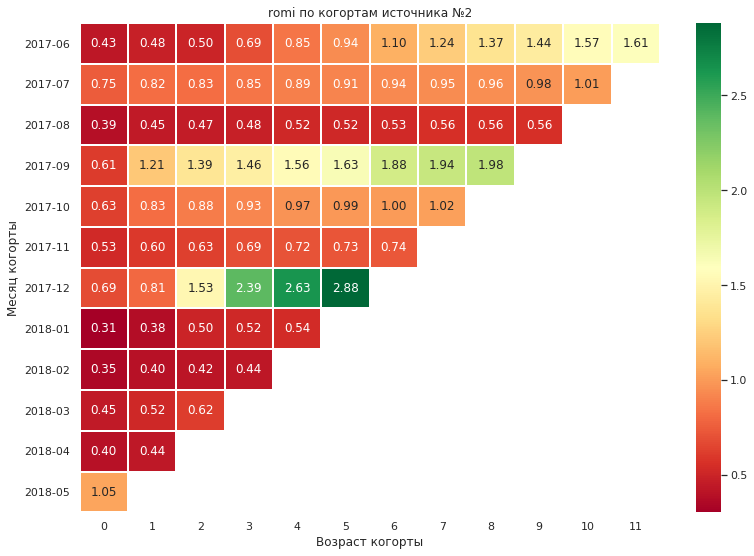

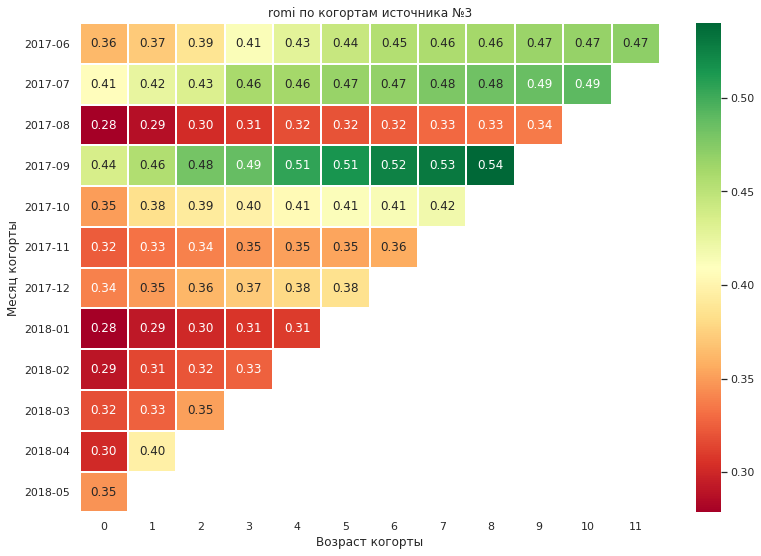

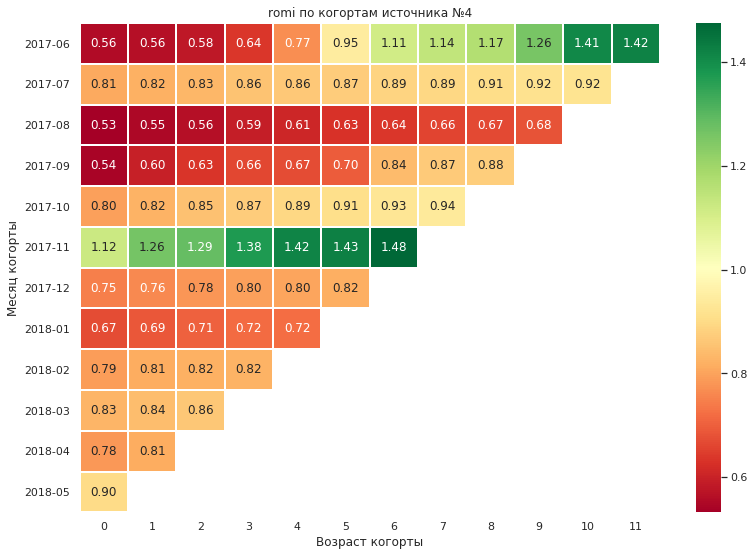

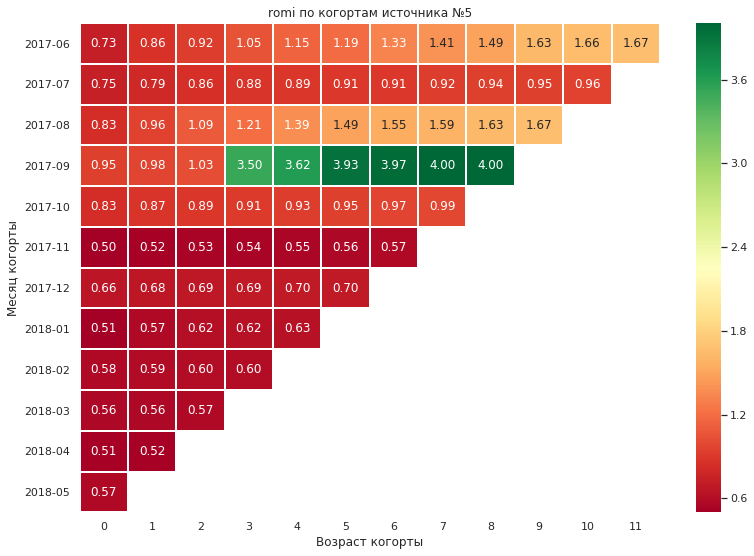

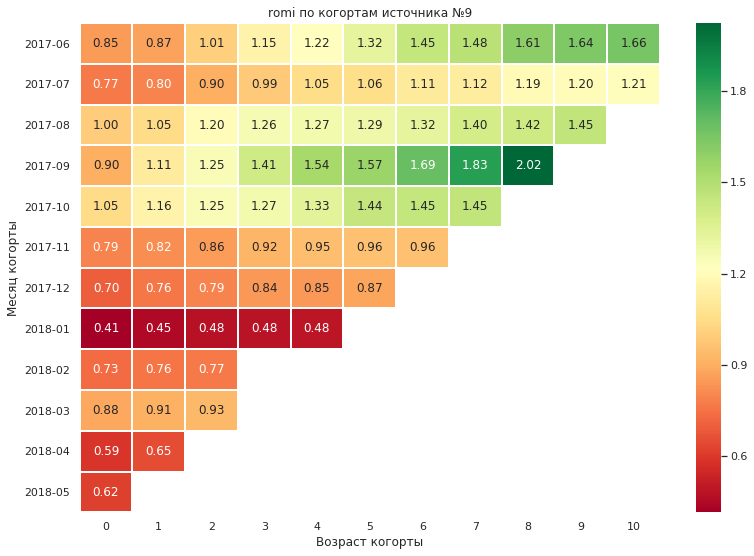

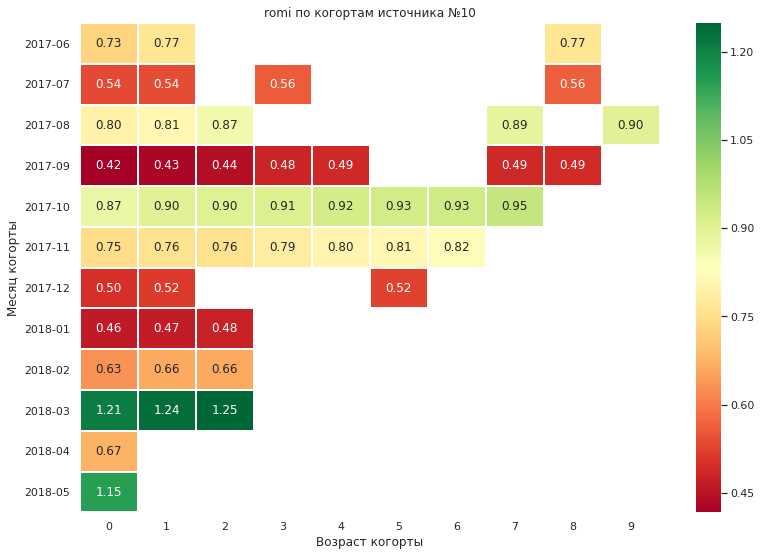

In [96]:
for source in costs['source_id'].unique():
    cohort_romi_source(source)

Источник №1 - чрезвычайно высокая окупаемость. Окупился в первый же месяц для июньской и июльской когорт. В дальнейшем был не так успешен: для августа-ноября окупился на второй месяц, для декабря-февраля не окупился вообще. Но внезапно великолепно сработал для марта - окупился в первый же месяц, причём в рекордным соотношением LTV/CAC.

Источник №2 окупился во второй месяц для самой прибыльной когорты портала - сентябрьской. Также он исключительно эффективно приманивает клиентов декабрьской когорты (окупился на третий месяц).

Источник №3 не окупился ни для одной когорты. И на него приходятся рекордные расходы по сравнению с другими источниками! Отписка.

Источник №4 - звезда ноябрьской когорты, месяца с рекордной пользовательской активностью на портале. Окупился в первый же месяц, чего не скажешь про другие когорты.

Источник №5 обеспечил новогодний всплеск от самой прибыльной когорты - сентябрьской. Окупился двукратно за один декабрь!

Источник №9 - высокая эффективность для когорт с июня по октябрь, затем посредственные результаты. Убирать зимой в кладовку!

Источник №10 мог месяцами не привлекать ни одного покупателя (пустые места на хитмапе). Зато очень бодро окупился на мартовской когорте.

#### 4.5 Окупаемость расходов по источникам (ROI)

Сгруппируем расходы на маркетинг по источникам.

In [97]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Выберем только первые визиты.

In [98]:
visits_by_source = visits.query('start_ts == first_visit')

Посчитаем доходы по источникам.

In [99]:
revenue_by_source = ((orders.merge(visits_by_source, on='uid', how='inner'))
                     .groupby('source_id')
                     .agg({'revenue':'sum'})
                     .reset_index()
                    )
revenue_by_source

,source_id,revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


Рассчитаем ROI.

In [100]:
roi = revenue_by_source.merge(costs_by_source)
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs']

In [101]:
roi.sort_values('roi', ascending = False)

,source_id,revenue,costs,roi
0,1,31090.55,20833.27,0.492351
1,2,46923.61,42806.04,0.096191
5,9,5759.40,5517.49,0.043844
4,5,52624.02,51757.10,0.016750
3,4,56696.83,61073.60,-0.071664
6,10,4450.33,5822.49,-0.235665
2,3,54511.24,141321.63,-0.614275


Источники №3,4,10 так и не смогли окупиться. Источник №1 - лучший по окупаемости.

### Шаг 5. Общий вывод
<a id="conclusion"></a>

Расчёт ROI по рекламным источникам сайта "Яндекс.Афиша" показал, что самым эффективным источником привлечения клиентов является №1 - в сравнении с другими его показатели просто зашкаливают. Источник № 7 не привлёк ни одного клиента, поэтому от него можно избавиться. Также малоэффективными являются источники №3,4,10, так как расходы на них так и не окупились покупками клиентов.

Когортный анализ ROMI для отдельных источников подтвердил бесполезность №3, который не окупился ни для одной когорты. Источник №10 мог месяцами не привлекать новых покупателей, что также говорит о его непригодности. Источник №4 хорошо провил себя только с ноябрьской когортой - в этот месяц на портале наблюдается рекордная активность. Бесполезен для остальных когорт.

Для источников №1 и №9 характерна сезонность. Первый быстро окупился для июньской, июльской и мартовской когорт. Девятый - для когорт с июня по октябрь. С остальными когортами хуже, теплолюбивые, наверное.

Источники №2 и №5 отлично сработали для самой прибыльной когорты - сентябрьской. Второй проявил себя на старте, а пятый был очень эффективен в предновогодние праздники.

Для сайта "Яндекс.Афиши" характерна достаточно высокая активность пользователей: количество уникальных пользоавателей в неделю превышает ежедневное почти в 6 раз, а ежемесячное - почти в 26 раз. Большинство пользователей проводят на сайте 60 секунд, а время от первого захода до первой покупки составляет в среднем 16 минут. Как раз достаточно времени, чтобы быстро зайти посмотреть расписание сеансов, затем уточнить место и время с тем, с кем идёшь в кино, вернуться и сделать покупку.

При этом, как ни странно, сервис является одноразовым для каждого пользователя. Среднее количество покупок на одного человека в день составляет 1,08, а в год - 1,32. Cредний Retention Rate на второй месяц «жизни» когорт составляет всего 6.52% (визиты) - люди почему-то массово перестают пользоваться сервисом после одного месяца. Может, действует система бесплатной месячной подписки?

Двумя когоротами, на которые стоит обратить внимание - это июнь и сентябрь 2017 года. Это единственные две когорты, которые в итоге окупили расходы на маркетинг (на седьмой и четвёртый месяц соответственно), они генерируют наибольший LTV.